In [6]:
import numpy as np
import matplotlib.pyplot as plt
import yt, caesar
from modules.visualize.render_rgb import RenderRGB, SingleRender
import modules as anal

import modules.anal_func as anal_func

In [7]:
plt.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

snap = 129
n = 0

# decide the snapshot
sb = anal.Simba('PC39BP4', size=25)
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/region_snap129_r100_gal000000.h5'
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)

toplot = ['Masses', 'Masses', 'Masses_s']

In [8]:
render = RenderRGB(snapfile, catfile, n, toplot, region=False, ifdust=True, dim=['Msun', 'Msun', 'Msun'])

yt : [INFO     ] 2024-08-29 10:22:12,272 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-29 10:22:12,273 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-29 10:22:12,299 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-29 10:22:12,299 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-29 10:22:12,299 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-29 10:22:12,300 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-29 10:22:12,300 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-29 10:22:12,300 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-29 10:22:12,301 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-29 10:22:12,301 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-29 10:22:12,301 Parameters: omega_radiation     

Camera settings: Center=[12776.428 15914.094 19264.375], Extent=100, Theta=101.12374835695019, Phi=168.87625164189325, Roll=0, Radius=100, XSize=400, YSize=400


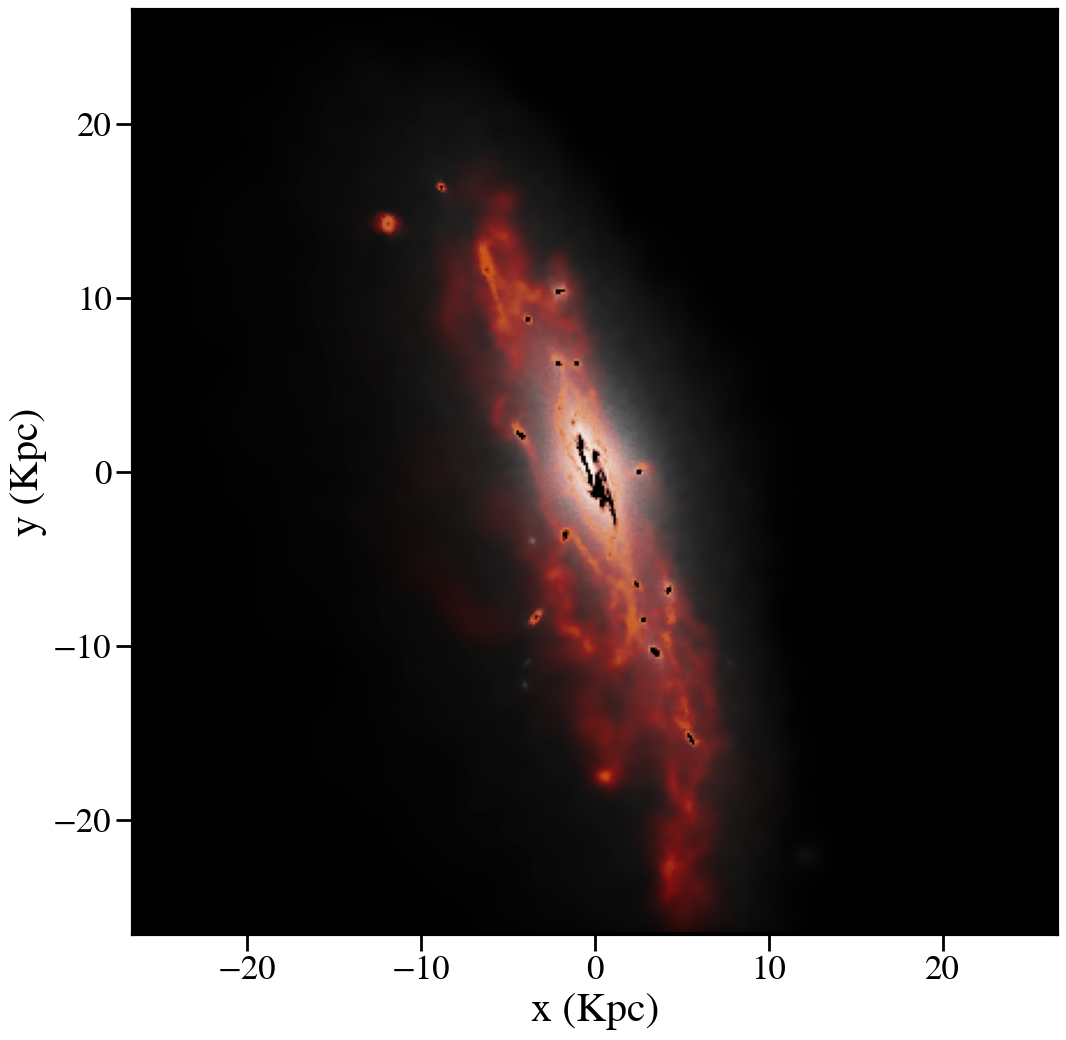

In [12]:
camera = render.set_camera(r=100, p=None, t=None, extent=100, zoom=2, spos='edgeon')
image = render.generate_images(camera, vmin=1, vmax=99.9)
render.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

In [5]:
render.set_video(50, r=50, extent=100, t=30, p=0, del_t=0, del_p=360, vmin=0, vmax=100,
                 xsize=500, ysize=500, zoom=2)
render.create_video(f'snap_{snap}_n{n}', interval=300)
render.flush()

Setting camera with 50 frames, p=0, t=30, r=50, extent=100
GIF saved as /home/lorenzong/analize_simba_cgm/output/plot/videos/snap_129_n0.gif


yt : [INFO     ] 2024-08-29 10:30:42,693 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-29 10:30:42,693 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-29 10:30:42,712 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-29 10:30:42,713 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-29 10:30:42,713 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-29 10:30:42,714 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-29 10:30:42,714 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-29 10:30:42,714 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-29 10:30:42,714 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-29 10:30:42,714 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-29 10:30:42,714 Parameters: omega_radiation     

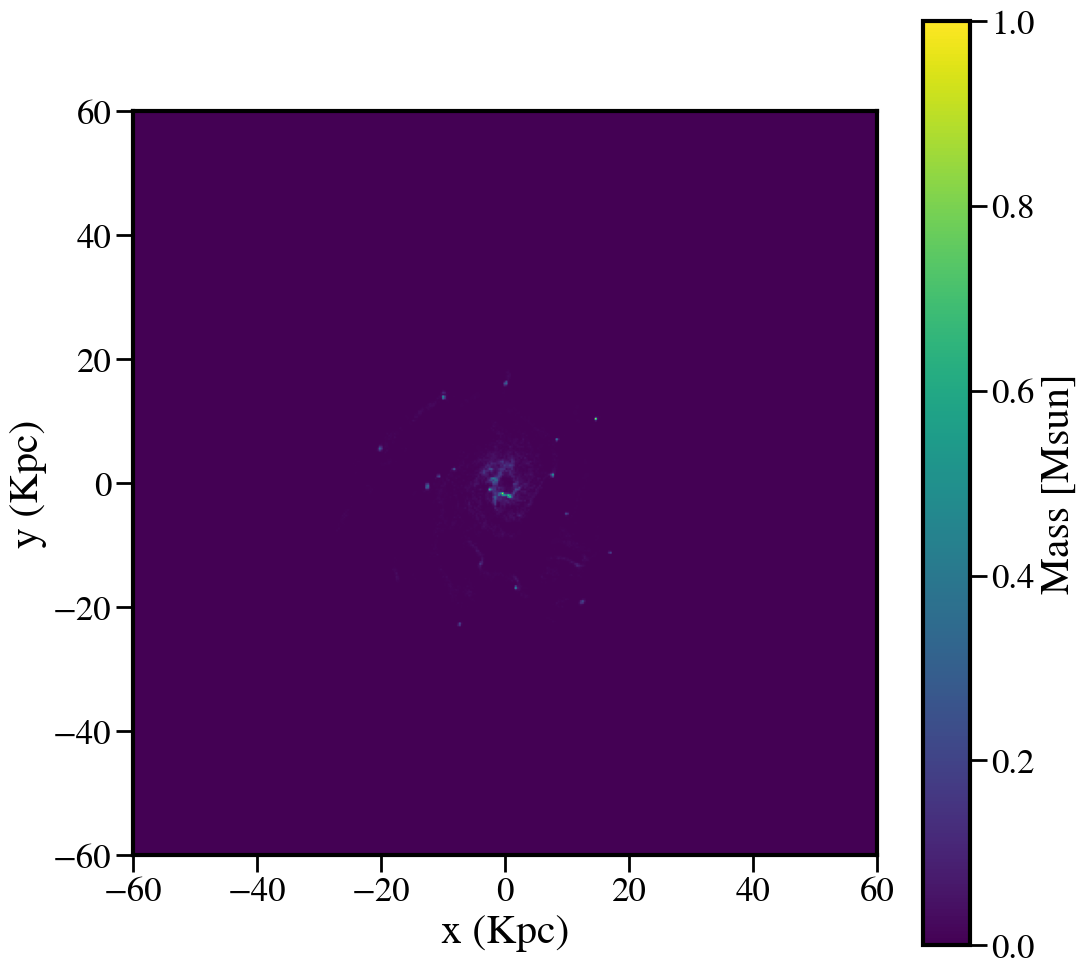

In [15]:
rendmap = SingleRender(subset, catfile, n, ('PartType0', 'Dust_Masses_s'), region=True, dim='Msun')
image = rendmap.single_map(r='infinity', p=None, t=None, ex=60, zoom=1, spos='faceon', vmin=1, vmax=100, mode='linear', zscale=False)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

yt : [INFO     ] 2024-08-29 10:05:05,735 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-29 10:05:05,736 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-29 10:05:05,755 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-29 10:05:05,755 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-29 10:05:05,756 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-29 10:05:05,756 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-29 10:05:05,756 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-29 10:05:05,756 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-29 10:05:05,757 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-29 10:05:05,757 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-29 10:05:05,757 Parameters: omega_radiation     

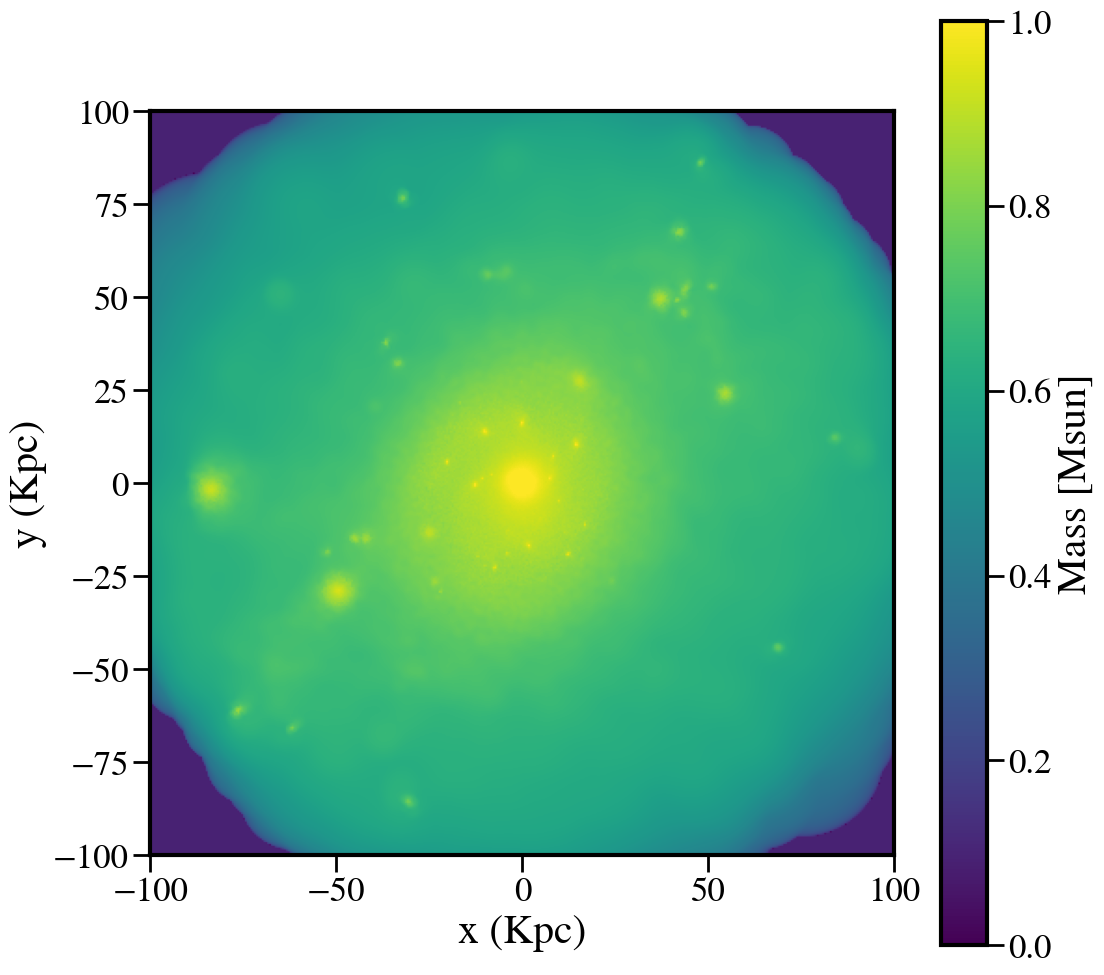

In [11]:
rendmap = SingleRender(subset, catfile, n, ('PartType4', 'Masses'), region=True, dim='Msun')
image = rendmap.single_map(r='infinity', p=None, t=None, ex=100, zoom=1, spos='faceon', vmin=1, vmax=99.9, mode='log', zscale=False)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

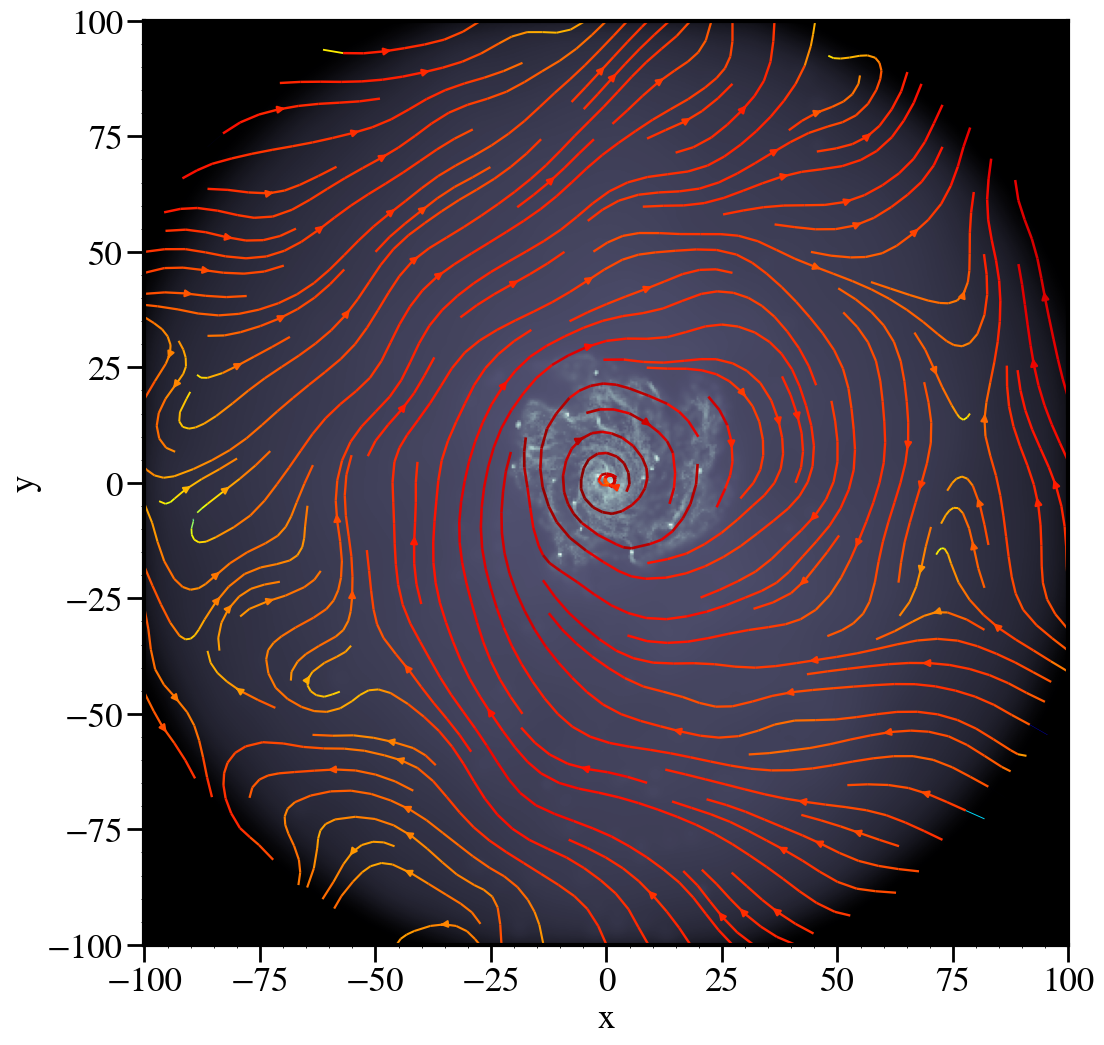

(<Figure size 1200x1200 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [19]:
rendmap.stream_plot(ex=100, p=None, t=None, xl='x',  yl='y', spos='faceon')